In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

row_training_data = pd.read_csv('data/train.csv')
row_test_data = pd.read_csv('data/test.csv')

In [2]:
row_training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Basic statistical description:

In [3]:
row_training_data.describe()

/Users/alex/anaconda3/envs/testenv/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


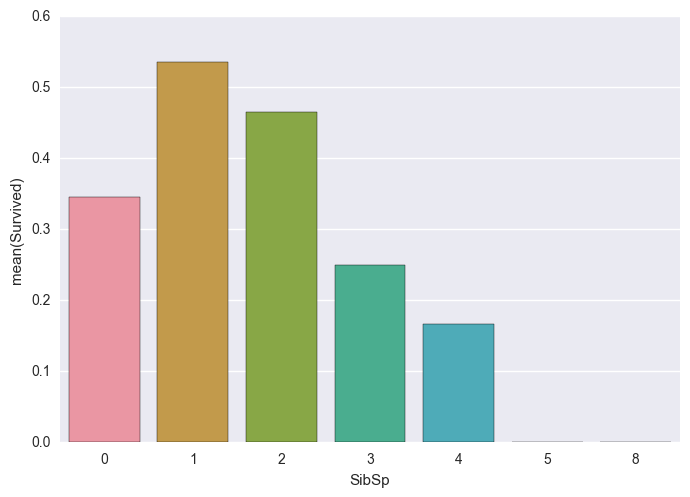

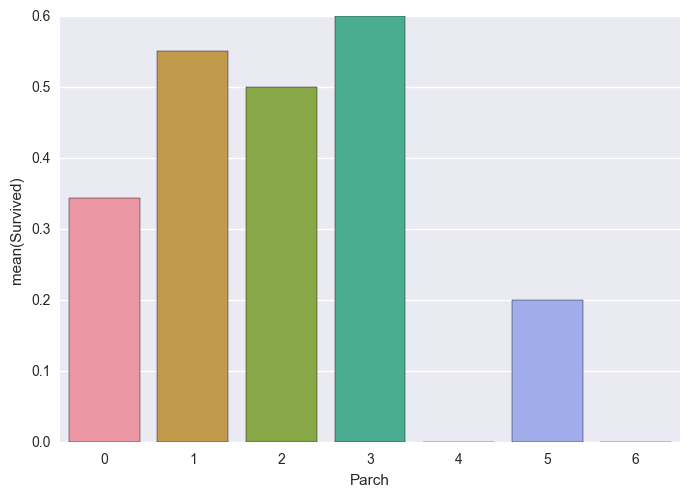

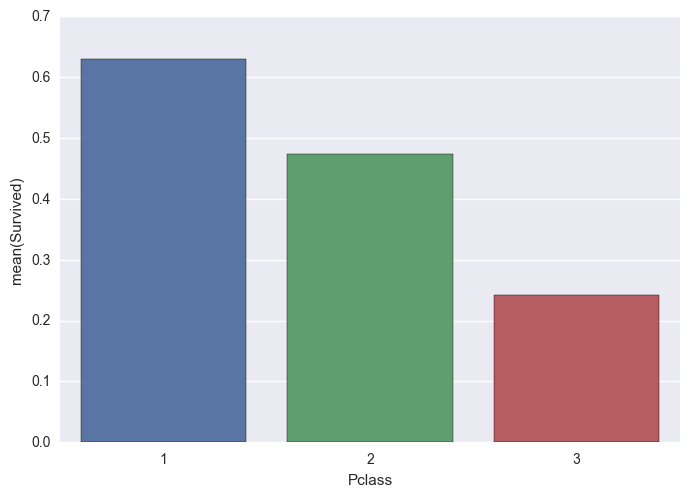

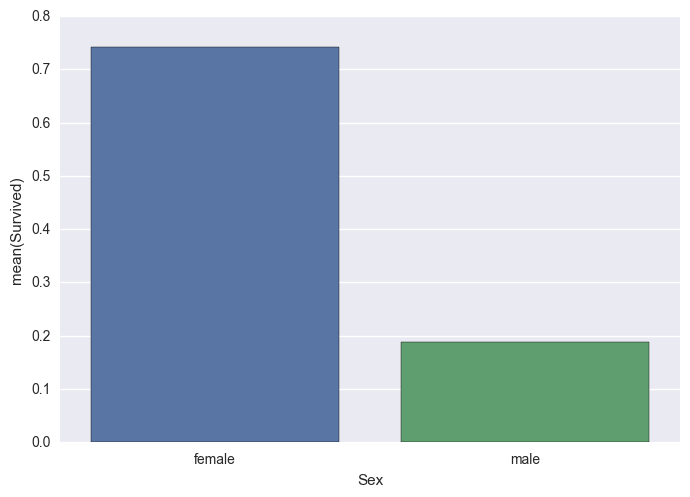

In [4]:
# Exploring data
# Survived by number of siblings/spouses aboard size
plot_data = row_training_data[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()
sns.barplot(x='SibSp', y='Survived', data=plot_data)
sns.plt.show()
# Survived by number of parents/children aboard
plot_data = row_training_data[['Parch', 'Survived']].groupby('Parch', as_index=False).mean()
sns.barplot(x='Parch', y='Survived', data=plot_data)
sns.plt.show()
# Survived by class
plot_data = row_training_data[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()
sns.barplot(x='Pclass', y='Survived', data=plot_data)
sns.plt.show()
# Survived by sex
plot_data = row_training_data[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()
sns.barplot(x='Sex', y='Survived', data=plot_data)
sns.plt.show()

In [5]:
def clean_data(df):
    # Create 'Title' feature
    title = df.Name.map(lambda x: re.compile(', (.*?)\.').findall(x)[0])
    title[title=='Mme'] = 'Mrs'
    title[title.isin(['Ms','Mlle'])] = 'Miss'
    title[title.isin(['Don', 'Jonkheer'])] = 'Sir'
    title[title.isin(['Dona', 'Lady', 'the Countess'])] = 'Lady'
    title[title.isin(['Capt', 'Col', 'Major', 'Dr', 'Officer', 'Rev'])] = 'Officer'
    df['Title'] = title
    # Combine number of siblings and parents into a 'FamilySize' column.
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    # Fill NA in Age column with median value
    median_age = df['Age'].median()
    df.Age.fillna(median_age, inplace=True)
    # Fill Embarked 
    emb_mode = df.Embarked.mode().values[0]
    df.Embarked.fillna(emb_mode, inplace=True)
    df['Embarked'] = df['Embarked'].map({'C':1, 'S':2, 'Q':3}).astype(int)
    # Convert categorial variables to the dummies
    df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Sex'], prefix='Sex')], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1)
    df = pd.concat([df, pd.get_dummies(df['Pclass'], prefix='Pclass')], axis=1)
    # Drop useless columns
    df.drop(['Sex', 'Embarked', 'Title', 'SibSp', 'Parch', 'Pclass', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    return df

In [6]:
train_df = clean_data(row_training_data)
y = train_df.Survived
X = train_df.drop('Survived', axis=1).values[:, 1:]
train_df.head()

,PassengerId,Survived,Age,Fare,FamilySize,Embarked_1,Embarked_2,Embarked_3,Sex_female,Sex_male,Lady,Master,Miss,Mr,Mrs,Officer,Sir,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,7.2500,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,38.0,71.2833,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,26.0,7.9250,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,35.0,53.1000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,0,35.0,8.0500,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
# Choosing an estimator along with its best hyperparameters
estimators = {
    RandomForestClassifier(n_estimators = 100): {
        'max_features': [0.5, 0.7, 1.],
        'max_depth': [5., None],
        'n_estimators': [75, 100, 125, 150, 200],
        'criterion': ['entropy', 'gini']
    },
    AdaBoostClassifier(): {
        'base_estimator': [None],
        'n_estimators': [75, 100, 125]
    },
    MLPClassifier(): {
        'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbfgs', 'sgd', 'adam'],
        'max_iter': [500, 1000]
    },
    GaussianProcessClassifier(): {
        'max_iter_predict': [100, 200, 300]
    },
    SVC(kernel="linear"): {
        'C': [0.025, 0.05, 0.01]
    }    
}

best_score = 0
best_estimator = None
best_params = None

for estimator, params in estimators.items():
    grid_search = GridSearchCV(estimator, params, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X, y)
    sorted(grid_search.grid_scores_, key=lambda x: x.mean_validation_score)
    print("Best score for " + str(estimator).split('(')[0] +" equals to " + str(grid_search.best_score_))
    rfc_params = grid_search.best_params_
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_estimator = estimator
        best_params = grid_search.best_params_
print("="*10)
print("Best estimator is " + str(best_estimator).split('(')[0])
print("Best params are " + str(best_params))
print("Best score is " + str(best_score))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/alex/anaconda3/envs/testenv/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/alex/anaconda3/envs/testenv/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   23.1s finished


Best score for MLPClassifier equals to 0.8282828282828283
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.3s finished


Best score for SVC equals to 0.8024691358024691
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   16.6s finished


Best score for RandomForestClassifier equals to 0.8338945005611672
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.1s finished


Best score for GaussianProcessClassifier equals to 0.7407407407407407
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.6s finished


Best score for AdaBoostClassifier equals to 0.8170594837261503
Best estimator is RandomForestClassifier
Best params are {'n_estimators': 100, 'max_depth': 5.0, 'criterion': 'entropy', 'max_features': 1.0}
Best score is 0.8338945005611672


In [8]:
model = RandomForestClassifier(n_estimators=best_params['n_estimators'], 
                               max_depth=best_params['max_depth'], 
                               max_features=best_params['max_features'], 
                               random_state=42, 
                               criterion=best_params['criterion'])
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5.0, max_features=1.0, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [9]:
test_data = clean_data(row_test_data)
test_data.Fare.fillna(test_data.Fare.median(), inplace=True)
test_data.insert(loc=15, column='Sir', value=pd.Series(np.zeros_like(test_data['Mr'])))
print(test_data.head())
test_data = test_data.values
output = model.predict(test_data[:, 1:])

   PassengerId   Age     Fare  FamilySize  Embarked_1  Embarked_2  Embarked_3  \
0          892  34.5   7.8292           1         0.0         0.0         1.0   
1          893  47.0   7.0000           2         0.0         1.0         0.0   
2          894  62.0   9.6875           1         0.0         0.0         1.0   
3          895  27.0   8.6625           1         0.0         1.0         0.0   
4          896  22.0  12.2875           3         0.0         1.0         0.0   

   Sex_female  Sex_male  Lady  Master  Miss   Mr  Mrs  Officer  Sir  Pclass_1  \
0         0.0       1.0   0.0     0.0   0.0  1.0  0.0      0.0  0.0       0.0   
1         1.0       0.0   0.0     0.0   0.0  0.0  1.0      0.0  0.0       0.0   
2         0.0       1.0   0.0     0.0   0.0  1.0  0.0      0.0  0.0       0.0   
3         0.0       1.0   0.0     0.0   0.0  1.0  0.0      0.0  0.0       0.0   
4         1.0       0.0   0.0     0.0   0.0  0.0  1.0      0.0  0.0       0.0   

   Pclass_2  Pclass_3  
0 

In [10]:
result = np.c_[test_data[:, 0].astype(int), output.astype(int)]
df_result = pd.DataFrame(result[:,0:2], columns=['PassengerId', 'Survived'])

In [11]:
df_result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [12]:
df_result.to_csv('results/titanic_1-0.csv', index=False)
